In [1]:
!pip install scikit-learn
!pip install imbalanced-learn  # for handling class imbalance
!pip install seaborn  # for visualization
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 85.8 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
# Data processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For autoencoder (using PyTorch)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# For sampling techniques
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import (
#     RandomUnderSampler,
#     NearMiss,
#     TomekLinks,
#     ClusterCentroids,
#     EditedNearestNeighbours
# )
# from imblearn.combine import SMOTETomek, SMOTEENN

# For evaluation metrics
from sklearn.metrics import (
    classification_report, 
    precision_recall_curve, 
    average_precision_score, 
    roc_auc_score,
    f1_score,
    confusion_matrix
)

# For model selection
from sklearn.model_selection import GridSearchCV, cross_val_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import defaultdict
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_curve, precision_recall_curve, auc, average_precision_score,
                            confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone, BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings("ignore")

In [4]:
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import defaultdict
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_curve, precision_recall_curve, auc, average_precision_score,
                            confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone, BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

First 5 records:    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

In [6]:
# If you skiped "hour_of_day" wont exist in the df
y = df['Class']

# X = df.drop(['Time','Class','hour_of_day'], axis=1)
X = df.drop(['Time','Class'], axis=1)

In [7]:
# Stratified split to maintain fraud distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # This ensures proportional distribution
)

scaler = StandardScaler()

# fit on only one column
scaler.fit(X_train[['Amount']])

# transform column in each split
for df in [X_train, X_test]:
    df[['Amount']] = scaler.transform(df[['Amount']])

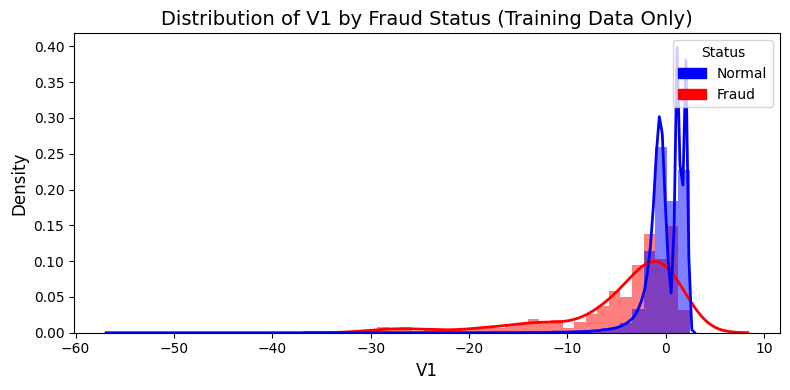

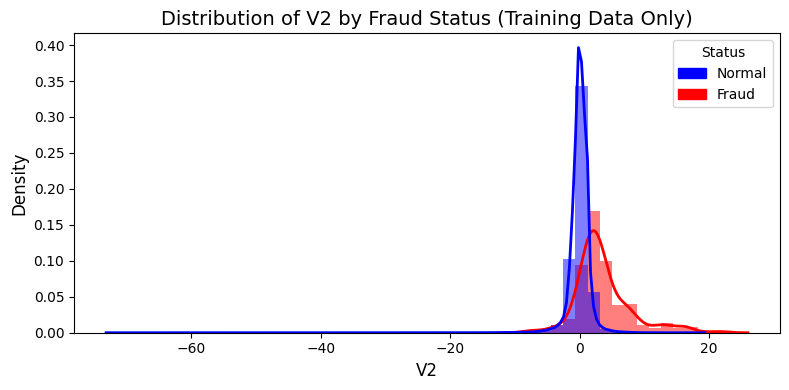

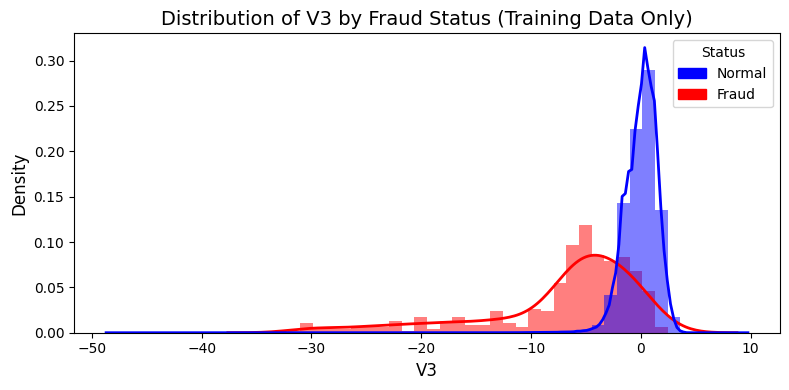

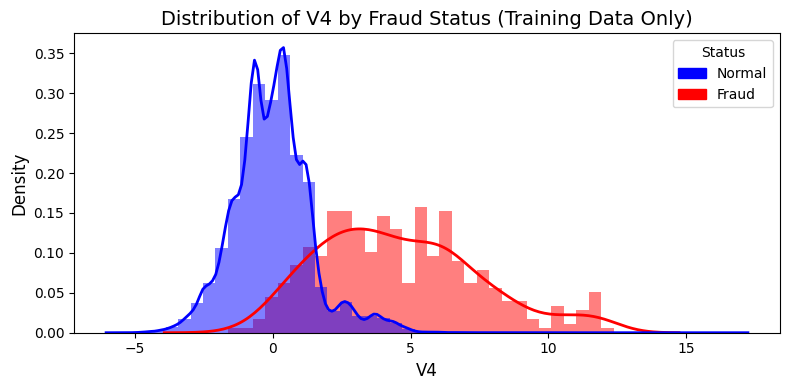

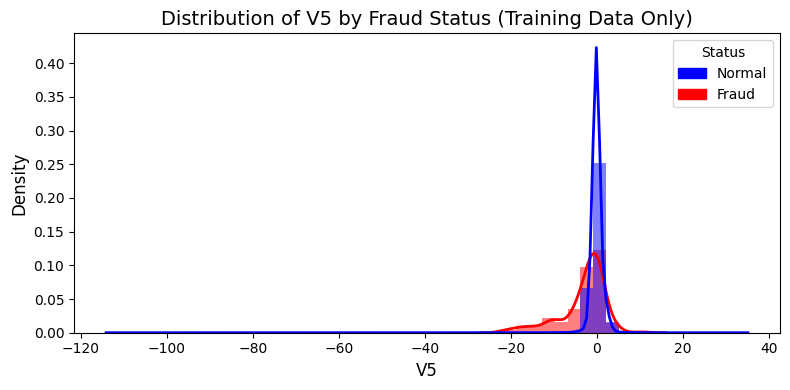

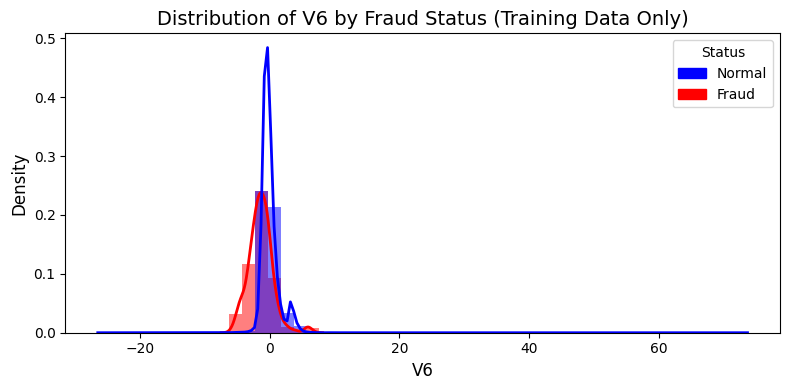

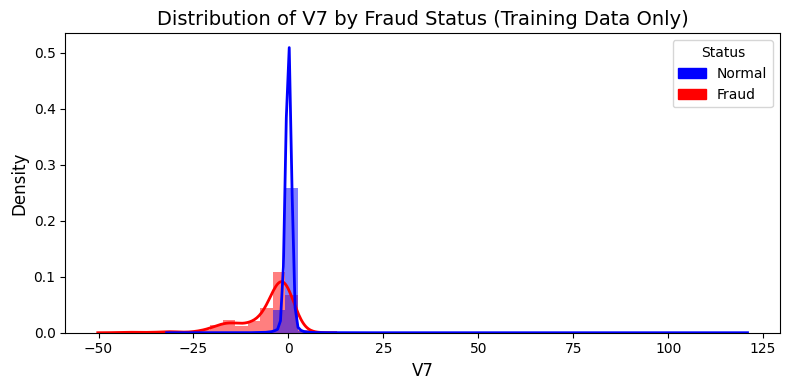

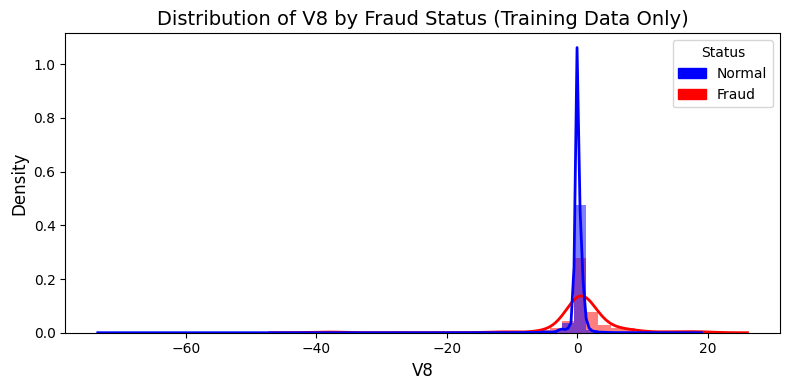

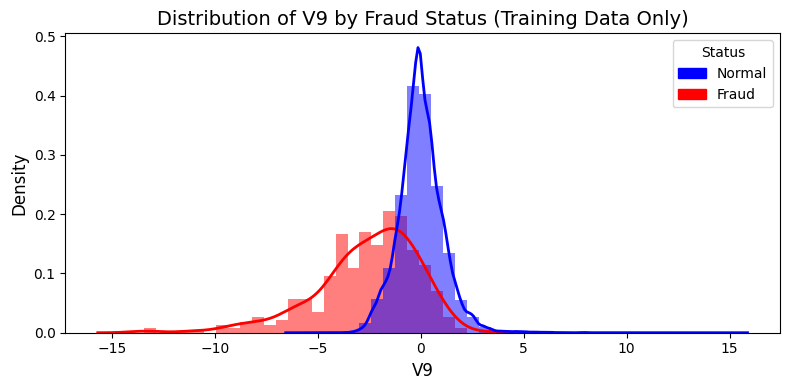

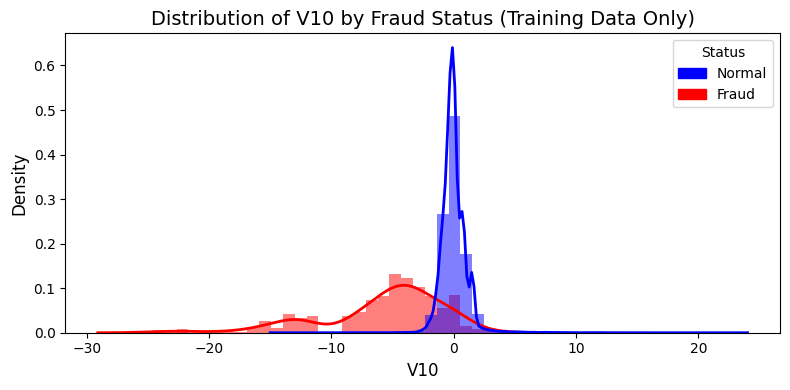

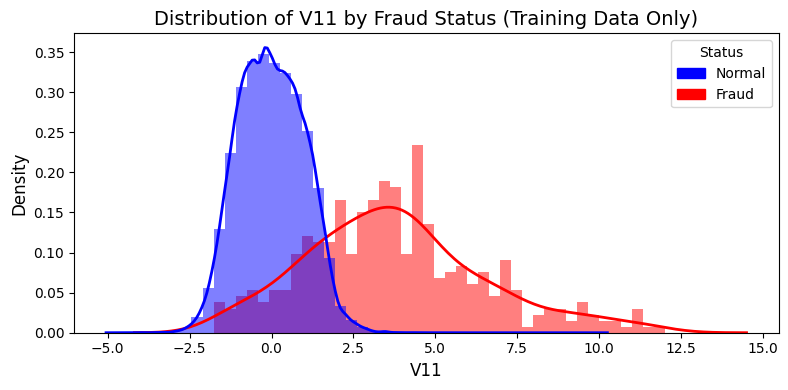

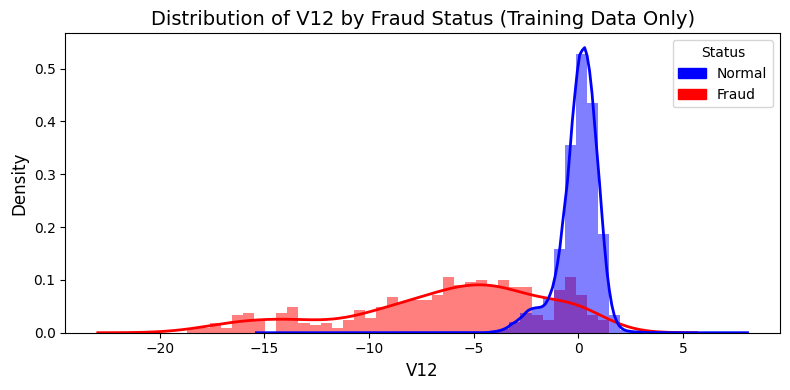

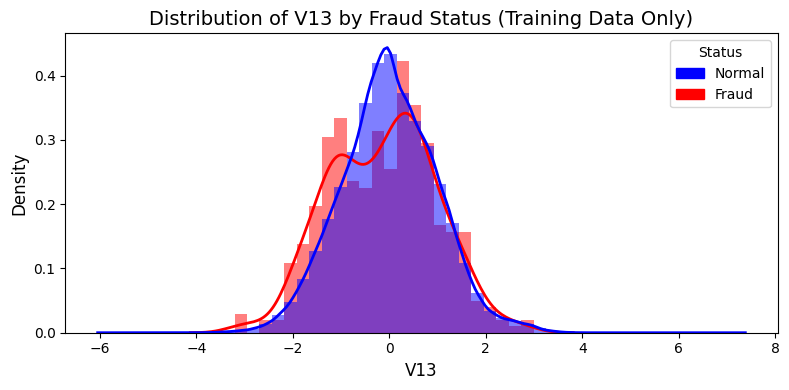

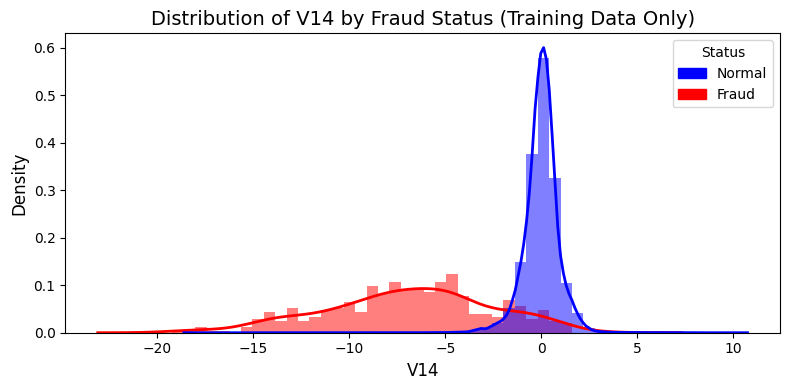

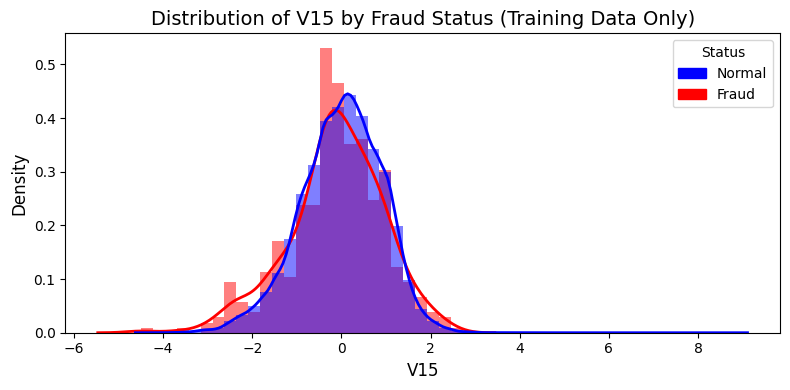

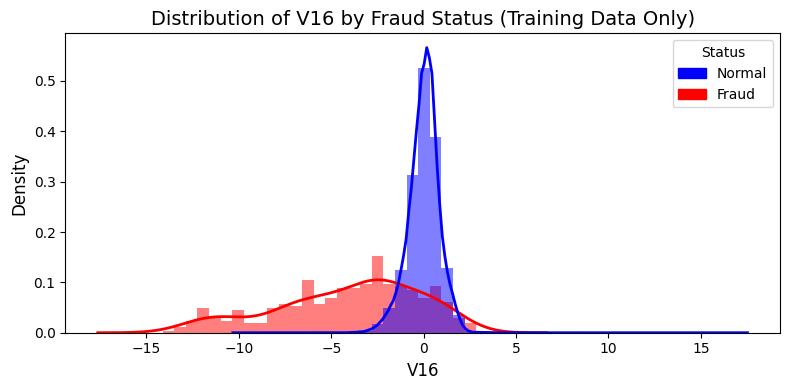

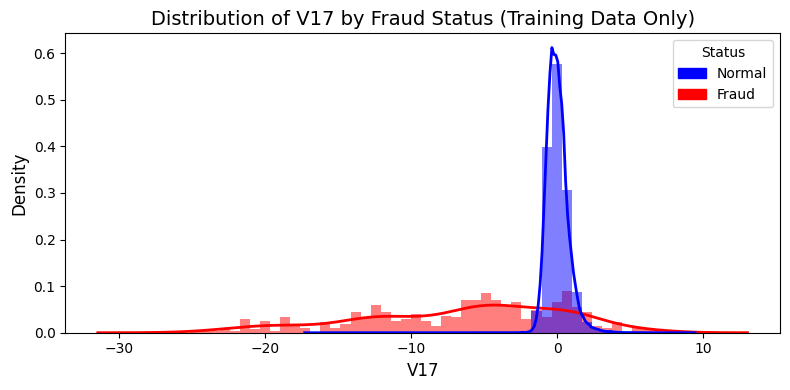

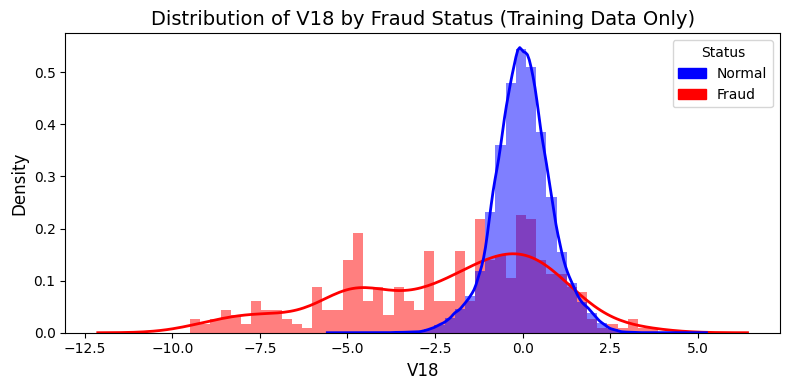

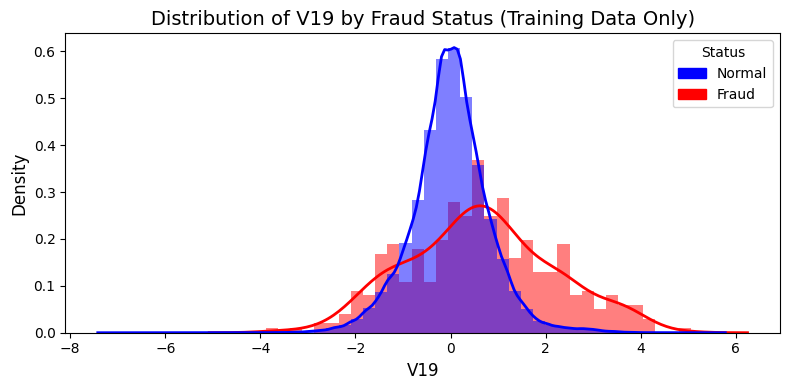

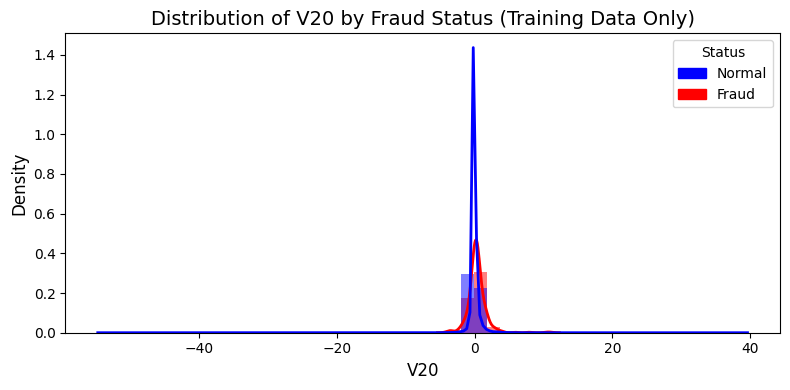

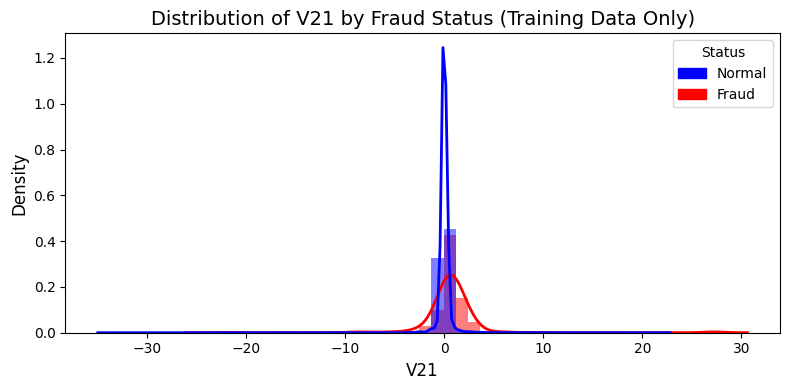

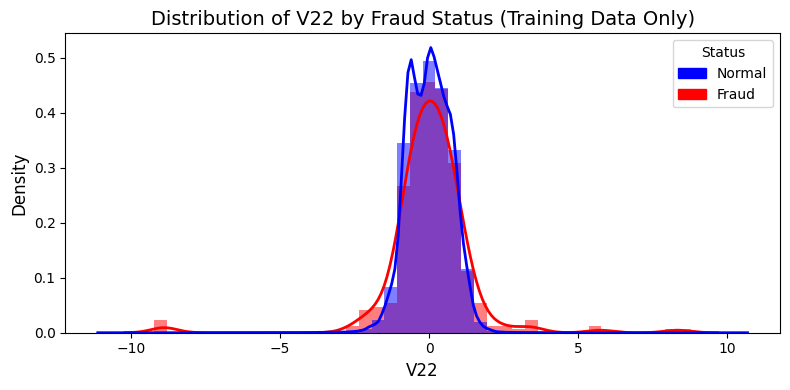

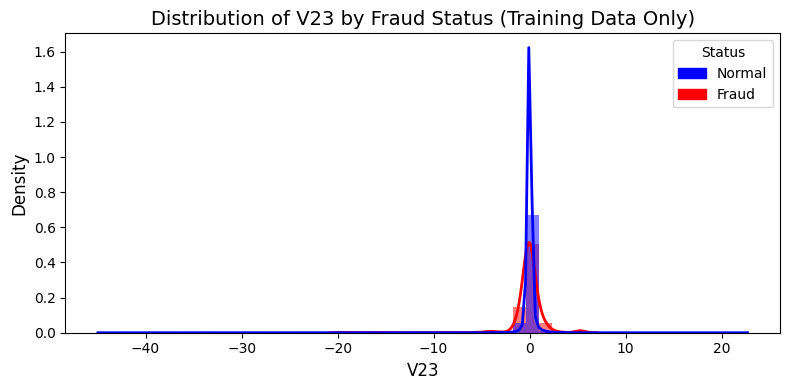

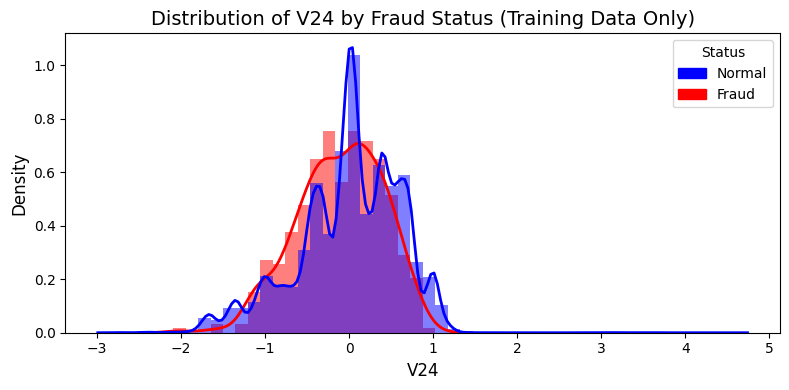

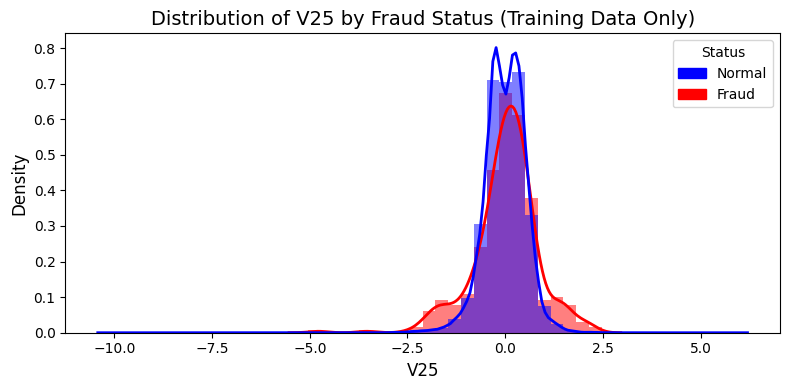

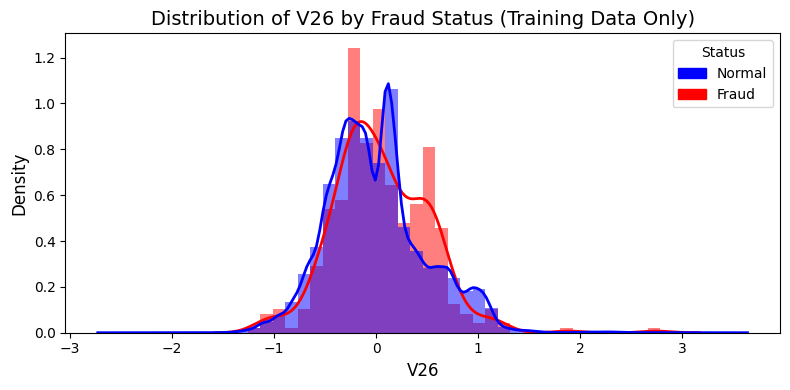

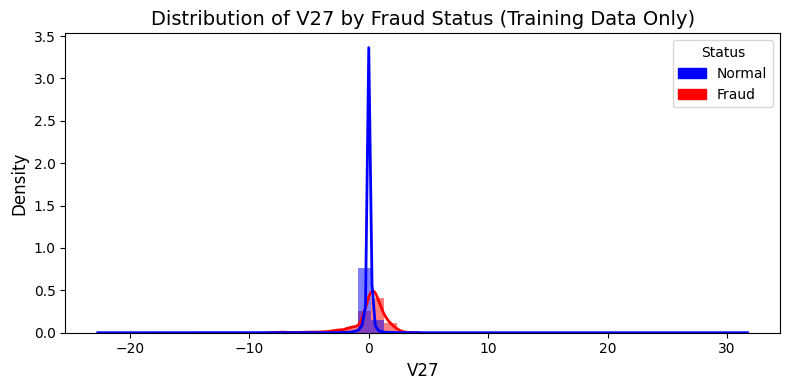

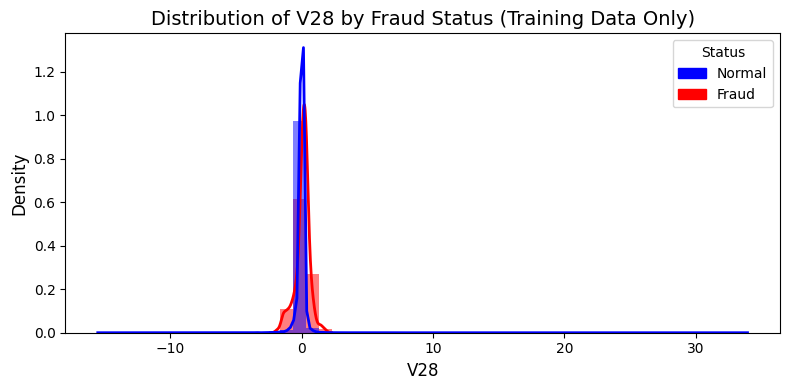

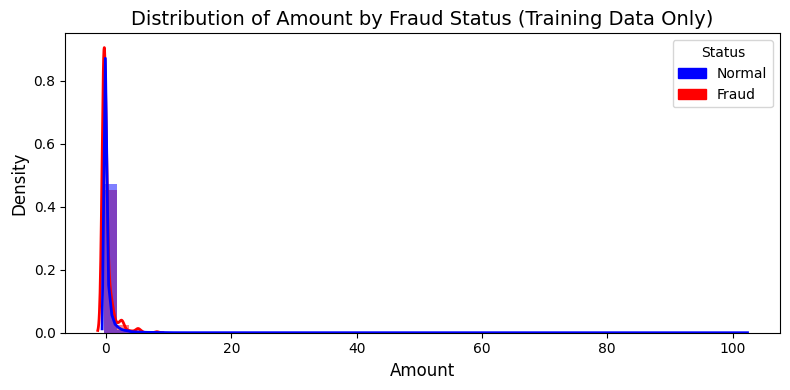

In [95]:
# Create a DataFrame with just the training data
df_train = X_train.copy()
df_train['Fraud'] = y_train.map({0: 'Normal', 1: 'Fraud'})  # map to string labels

# Same visualization code but with df_train
cols = list(X_train.columns)
palette = {'Normal': 'blue', 'Fraud': 'red'}

# Pre-define legend handles
legend_handles = [
    Patch(color=palette['Normal'], label='Normal'),
    Patch(color=palette['Fraud'], label='Fraud')
]

for col in cols:
    plt.figure(figsize=(8, 4))
    
    # Plot histograms & KDEs using only training data
    sns.histplot(
        data=df_train, x=col, hue='Fraud',
        bins=50, stat='density', common_norm=False,
        alpha=0.5, palette=palette, edgecolor=None,
        legend=False
    )
    sns.kdeplot(
        data=df_train, x=col, hue='Fraud',
        common_norm=False, palette=palette,
        linewidth=2, legend=False
    )
    
    # Rest of the code remains the same
    plt.title(f'Distribution of {col} by Fraud Status (Training Data Only)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(handles=legend_handles, title='Status', loc='upper right')
    plt.tight_layout()
    plt.show()

### Polynomial Feature Expansion, Radial Basis Function (RBF) Kernel Transformation, Random Fourier Features

In [96]:
# Features with overlapping distributions
overlap_features = ['V1', 'V2', 'V5', 'V6', 'V7', 'V8', 'V13', 'V15', 
                    'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 
                    'V26', 'V27', 'V28', 'Amount']

In [97]:
# Polynomial Feature Transformation
from sklearn.preprocessing import PolynomialFeaturesa

# Original data for reference
X_train_original = X_train.copy()
X_train_original['Fraud'] = y_train.map({0: 'Normal', 1: 'Fraud'})

# 1. Polynomial Feature Transformation
X_train_poly_transformed = X_train.copy()
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_overlap = X_train[overlap_features]
poly.fit(X_train_overlap)
X_train_poly = poly.transform(X_train_overlap)

# Get transformed feature names
poly_feature_names = poly.get_feature_names_out(overlap_features)

# Remove original overlapping features
X_train_poly_transformed = X_train_poly_transformed.drop(overlap_features, axis=1)

# Add polynomial features
X_train_poly_df = pd.DataFrame(
    X_train_poly, 
    columns=poly_feature_names, 
    index=X_train.index
)
X_train_poly_transformed = pd.concat([X_train_poly_transformed, X_train_poly_df], axis=1)
X_train_poly_transformed['Fraud'] = y_train.map({0: 'Normal', 1: 'Fraud'})

ImportError: cannot import name 'PolynomialFeaturesa' from 'sklearn.preprocessing' (/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/__init__.py)

In [106]:
# RBF Kernel Transformation
from sklearn.metrics.pairwise import rbf_kernel

X_train_rbf_transformed = X_train.copy()
n_centers = 10  # Using fewer centers to avoid too many features
np.random.seed(42)
centers_idx = np.random.choice(X_train.shape[0], n_centers, replace=False)
centers = X_train.iloc[centers_idx][overlap_features].values

gamma = 0.01
X_train_rbf = rbf_kernel(X_train[overlap_features].values, centers, gamma=gamma)

# Remove original overlapping features
X_train_rbf_transformed = X_train_rbf_transformed.drop(overlap_features, axis=1)

# Add RBF features
rbf_feature_names = [f'rbf_{i}' for i in range(n_centers)]
X_train_rbf_df = pd.DataFrame(
    X_train_rbf, 
    columns=rbf_feature_names, 
    index=X_train.index
)
X_train_rbf_transformed = pd.concat([X_train_rbf_transformed, X_train_rbf_df], axis=1)
X_train_rbf_transformed['Fraud'] = y_train.map({0: 'Normal', 1: 'Fraud'})

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Try a grid of values with cross-validation
gamma_values = [0.01, 0.1, 1.0]
center_values = [10, 20, 30]

best_auc = 0
best_params = None

# Split training data for validation WITHOUT dropping overlap_features yet
from joblib import Parallel, delayed  # For parallelization

# 1. Pre-split the data
X_train_full, X_val_full, y_train_subset, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, random_state=42, stratify=y_train
)

# 2. Extract relevant feature data as NumPy arrays (faster than pandas operations)
X_train_overlap = X_train_full[overlap_features].values
X_val_overlap = X_val_full[overlap_features].values
X_train_rest = X_train_full.drop(overlap_features, axis=1).values
X_val_rest = X_val_full.drop(overlap_features, axis=1).values

# 3. Pre-compute centers for each n_centers value
center_arrays = {}
for n_centers in center_values:
    np.random.seed(42)  # Ensure reproducibility
    centers_idx = np.random.choice(X_train_full.shape[0], n_centers, replace=False)
    center_arrays[n_centers] = X_train_full.iloc[centers_idx][overlap_features].values

# 4. Optimize the evaluation function
def evaluate_params(gamma, n_centers):
    # Get pre-computed centers
    centers = center_arrays[n_centers]
    
    # Compute RBF features (directly with NumPy)
    X_train_rbf = rbf_kernel(X_train_overlap, centers, gamma=gamma)
    X_val_rbf = rbf_kernel(X_val_overlap, centers, gamma=gamma)
    
    # Combine with other features
    X_train_combined = np.hstack([X_train_rest, X_train_rbf])
    X_val_combined = np.hstack([X_val_rest, X_val_rbf])
    
    # Use a faster model configuration
    model = RandomForestClassifier(
        n_estimators=50,  # Fewer trees for speed
        max_depth=10,     # Limit depth
        n_jobs=-1,        # Use all cores
        random_state=42
    )
    
    # Train and evaluate
    model.fit(X_train_combined, y_train_subset)
    y_val_pred = model.predict_proba(X_val_combined)[:, 1]
    auc = roc_auc_score(y_val, y_val_pred)
    
    return gamma, n_centers, auc

# 5. Parallel execution of parameter combinations
results = Parallel(n_jobs=-1)(
    delayed(evaluate_params)(gamma, n_centers) 
    for gamma in gamma_values 
    for n_centers in center_values
)

# Process results
for gamma, n_centers, auc in results:
    print(f"Gamma: {gamma}, Centers: {n_centers}, AUC: {auc:.4f}")
    if auc > best_auc:
        best_auc = auc
        best_params = (gamma, n_centers)

print(f"Best parameters: Gamma = {best_params[0]}, Centers = {best_params[1]}")

Gamma: 0.01, Centers: 10, AUC: 0.9730
Gamma: 0.01, Centers: 20, AUC: 0.9633
Gamma: 0.01, Centers: 30, AUC: 0.9591
Gamma: 0.1, Centers: 10, AUC: 0.9678
Gamma: 0.1, Centers: 20, AUC: 0.9659
Gamma: 0.1, Centers: 30, AUC: 0.9615
Gamma: 1.0, Centers: 10, AUC: 0.9690
Gamma: 1.0, Centers: 20, AUC: 0.9668
Gamma: 1.0, Centers: 30, AUC: 0.9599
Best parameters: Gamma = 0.01, Centers = 10


In [ ]:
# Random Fourier Features Transformation
from sklearn.kernel_approximation import RBFSampler

X_train_rff_transformed = X_train.copy()
n_components = 200 #len(overlap_features) * 3  # 3 RFF components per original feature
rbf_sampler = RBFSampler(gamma=5, n_components=n_components, random_state=42)
rbf_sampler.fit(X_train[overlap_features])
X_train_rff = rbf_sampler.transform(X_train[overlap_features])

# Remove original overlapping features
X_train_rff_transformed = X_train_rff_transformed.drop(overlap_features, axis=1)

# Add RFF features
rff_feature_names = [f'rff_{i}' for i in range(n_components)]
X_train_rff_df = pd.DataFrame(
    X_train_rff, 
    columns=rff_feature_names, 
    index=X_train.index
)
X_train_rff_transformed = pd.concat([X_train_rff_transformed, X_train_rff_df], axis=1)
X_train_rff_transformed['Fraud'] = y_train.map({0: 'Normal', 1: 'Fraud'})

In [ ]:
from matplotlib.patches import Patch

def visualize_feature_distributions(dataframe, features, title_prefix=""):
    """Visualize the distribution of features in a dataframe"""
    palette = {'Normal': 'blue', 'Fraud': 'red'}
    
    # Pre-define legend handles
    legend_handles = [
        Patch(color=palette['Normal'], label='Normal'),
        Patch(color=palette['Fraud'], label='Fraud')
    ]
    
    for col in features:
        plt.figure(figsize=(8, 4))
        
        # Plot histograms & KDEs
        sns.histplot(
            data=dataframe, x=col, hue='Fraud',
            bins=50, stat='density', common_norm=False,
            alpha=0.5, palette=palette, edgecolor=None,
            legend=False
        )
        sns.kdeplot(
            data=dataframe, x=col, hue='Fraud',
            common_norm=False, palette=palette,
            linewidth=2, legend=False
        )
        
        # Titles & axes
        plt.title(f'{title_prefix} Distribution of {col} by Fraud Status', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend(handles=legend_handles, title='Status', loc='upper right')
        plt.tight_layout()
        plt.show()

In [ ]:
# Use a subset of polynomial features for visualization
poly_features_to_plot = [f for f in poly_feature_names if '^3' in f][:5]  # Show some squared terms
visualize_feature_distributions(X_train_poly_transformed, poly_features_to_plot, "Polynomial")

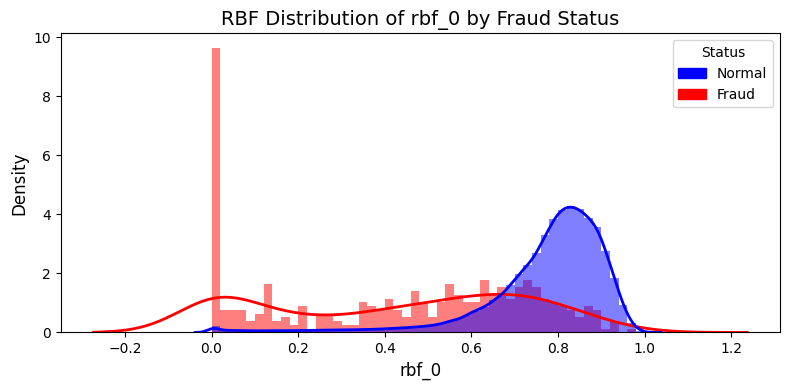

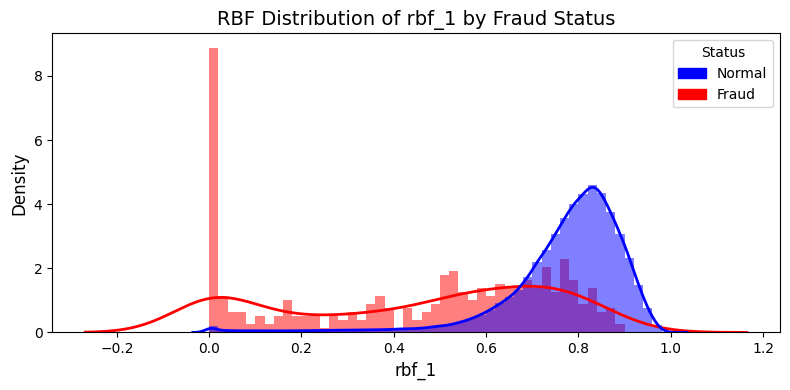

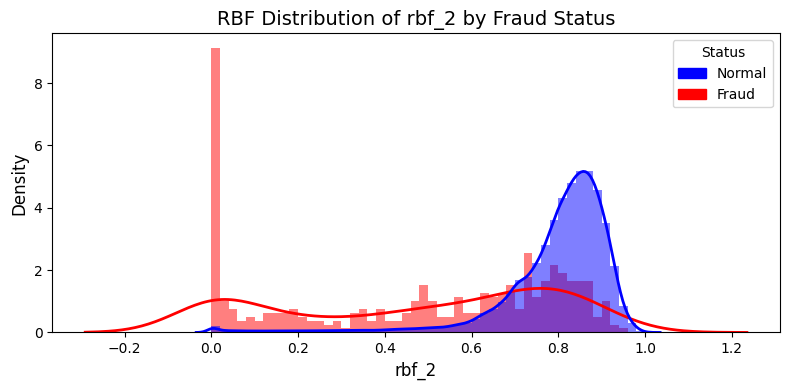

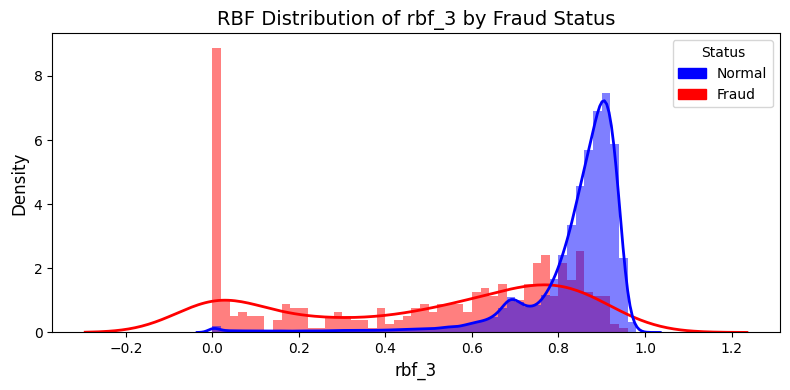

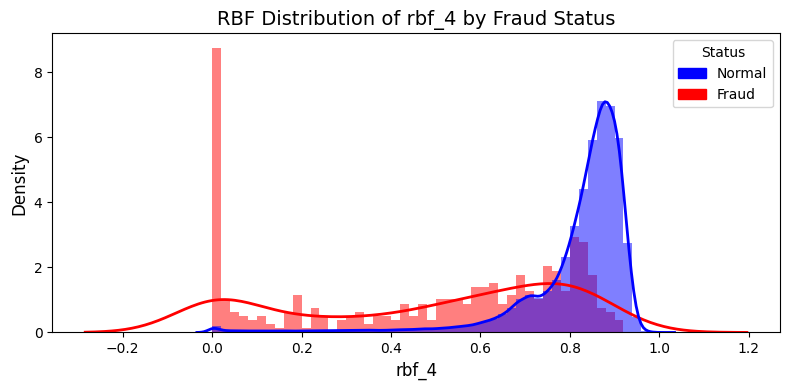

In [107]:
# RBF features visualization
rbf_features_to_plot = rbf_feature_names[:5]  # Show first 5 RBF features
visualize_feature_distributions(X_train_rbf_transformed, rbf_features_to_plot, "RBF")

In [ ]:
# RFF features visualization
rff_features_to_plot = rff_feature_names[:5]  # Show first 5 RFF features
visualize_feature_distributions(X_train_rff_transformed, rff_features_to_plot, "RFF")

In [ ]:
#!pip install umap-learn

In [ ]:
from umap import UMAP

def umap_visualization(X, y, title, n_samples=5000):
    """Create a UMAP visualization with optional downsampling"""
    # Remove 'Fraud' column if it exists
    if 'Fraud' in X.columns:
        X_viz = X.drop('Fraud', axis=1)
    else:
        X_viz = X.copy()
    
    # Convert target to numeric
    y_numeric = y.map({'Normal': 0, 'Fraud': 1}) if isinstance(y.iloc[0], str) else y
    
    # Downsample if dataset is large
    if X_viz.shape[0] > n_samples:
        # Ensure we get a balanced sample of fraud and normal
        fraud_idx = y_numeric[y_numeric == 1].index
        normal_idx = y_numeric[y_numeric == 0].index
        
        # Determine sample sizes (keep all fraud cases if possible)
        if len(fraud_idx) <= n_samples // 2:
            n_fraud = len(fraud_idx)
            n_normal = n_samples - n_fraud
        else:
            n_fraud = n_samples // 2
            n_normal = n_samples - n_fraud
        
        # Sample indices
        sampled_fraud = np.random.choice(fraud_idx, size=min(n_fraud, len(fraud_idx)), replace=False)
        sampled_normal = np.random.choice(normal_idx, size=min(n_normal, len(normal_idx)), replace=False)
        sampled_idx = np.concatenate([sampled_fraud, sampled_normal])
        
        X_sample = X_viz.loc[sampled_idx]
        y_sample = y_numeric.loc[sampled_idx]
    else:
        X_sample = X_viz
        y_sample = y_numeric
    
    # Apply UMAP
    umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    X_umap = umap_model.fit_transform(X_sample)
    
    # Create plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], 
                         c=y_sample, cmap='coolwarm', 
                         alpha=0.6, s=20)
    plt.colorbar(scatter, label='Class (0=Normal, 1=Fraud)')
    plt.title(f'UMAP Visualization: {title}')
    plt.tight_layout()
    plt.show()

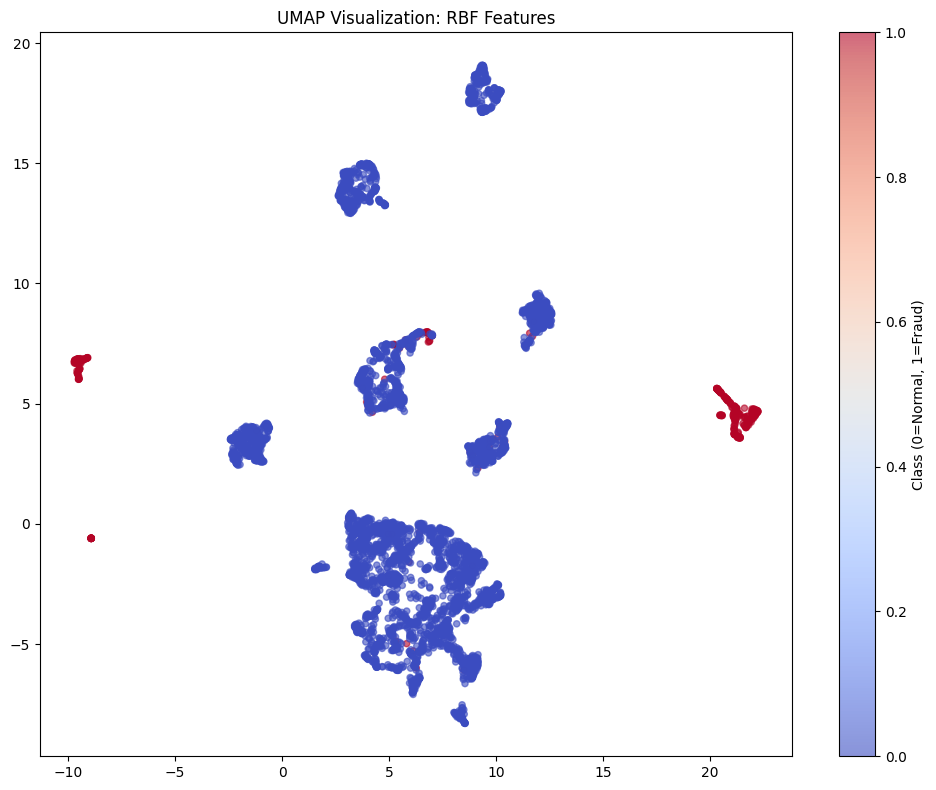

In [108]:
umap_visualization(X_train_rbf_transformed, y_train, "RBF Features", n_samples=5000)

In [109]:
X_train_rbf_transformed.head()

,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,...,rbf_1,rbf_2,rbf_3,rbf_4,rbf_5,rbf_6,rbf_7,rbf_8,rbf_9,Fraud
265518,-1.355130,-0.661630,1.406819,-0.157403,-0.113729,0.510277,-0.066555,0.352514,-0.765670,0.141938,...,0.707913,0.616477,0.657392,0.690504,0.054204,0.710678,0.678240,0.593706,0.801456,Normal
180305,-3.058693,0.247945,0.045826,0.284864,-0.254903,0.325560,0.721068,-0.754029,-0.270842,-0.695698,...,0.651029,0.698239,0.684236,0.679158,0.057414,0.747726,0.712188,0.626157,0.725959,Normal
42664,0.711976,-0.992425,0.000772,-2.009561,-0.386845,1.820161,0.122746,1.123344,-0.724616,0.147255,...,0.468377,0.502165,0.563579,0.554049,0.068167,0.536737,0.562026,0.529956,0.508072,Normal
198723,-0.747565,-1.668119,-1.118447,1.756121,0.093136,-0.722450,-0.195288,-0.065888,0.072781,0.768237,...,0.871371,0.795263,0.836288,0.924578,0.071514,0.890365,0.819307,0.611717,0.890405,Normal
82325,0.115903,-3.454854,-0.044782,-0.558955,-0.251076,-0.054708,0.134659,-2.096099,-0.399525,1.597589,...,0.826140,0.923324,0.879185,0.922249,0.102024,0.917147,0.943962,0.738180,0.816380,Normal


In [110]:
# 1. First, apply the best parameters from your grid search
best_gamma = 0.01  # From your previous results
best_n_centers = 10  # From your previous results

# 2. Generate centers using the training data
np.random.seed(42)  # For reproducibility
centers_idx = np.random.choice(X_train.shape[0], best_n_centers, replace=False)
centers = X_train.iloc[centers_idx][overlap_features].values

# 3. Transform training data
X_train_rbf = rbf_kernel(X_train[overlap_features].values, centers, gamma=best_gamma)
rbf_feature_names = [f'rbf_{i}' for i in range(best_n_centers)]
X_train_rbf_df = pd.DataFrame(X_train_rbf, columns=rbf_feature_names, index=X_train.index)

# 4. Create final training dataset (dropping original overlapping features)
X_train_transformed = X_train.drop(overlap_features, axis=1)
X_train_transformed = pd.concat([X_train_transformed, X_train_rbf_df], axis=1)

# 5. Transform test data using the SAME centers and gamma
X_test_rbf = rbf_kernel(X_test[overlap_features].values, centers, gamma=best_gamma)
X_test_rbf_df = pd.DataFrame(X_test_rbf, columns=rbf_feature_names, index=X_test.index)

# 6. Create final test dataset (dropping original overlapping features)
X_test_transformed = X_test.drop(overlap_features, axis=1)
X_test_transformed = pd.concat([X_test_transformed, X_test_rbf_df], axis=1)

# 7. Verify shapes
print(f"Original X_train shape: {X_train.shape}")
print(f"Transformed X_train shape: {X_train_transformed.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Transformed X_test shape: {X_test_transformed.shape}")

Original X_train shape: (227845, 29)
Transformed X_train shape: (227845, 20)
Original X_test shape: (56962, 29)
Transformed X_test shape: (56962, 20)


In [112]:
X_train_array = np.array(X_train_transformed)
y_train_array = np.array(y_train)
X_test_array = np.array(X_test_transformed)
y_test_array = np.array(y_test)

def check_data_quality(df):
    """
    Check a DataFrame for:
    - Missing values (count and percentage)
    - Data types (especially object types)
    - String values in columns
    
    Args:
        df: pandas DataFrame to analyze
    
    Returns:
        Prints a comprehensive report and returns a summary DataFrame
    """
    # Total rows
    total_rows = len(df)
    
    # Missing values analysis
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / total_rows * 100).round(2)
    
    # Data types
    dtypes = df.dtypes
    
    # Check for string values in each column
    contains_strings = []
    for col in df.columns:
        if df[col].dtype == 'object':
            contains_strings.append(True)
        else:
            # Check if any numeric column contains strings
            try:
                df[col].astype(float)
                contains_strings.append(False)
            except:
                contains_strings.append(True)
    
    # Create summary DataFrame
    summary_df = pd.DataFrame({
        'Data Type': dtypes,
        'Missing Values': missing_values,
        'Missing Percentage': missing_percentage,
        'Contains Strings': contains_strings,
        'Is Object Type': dtypes == 'object'
    })
    
    # Print report
    print(f"Dataset has {total_rows} rows and {len(df.columns)} columns.")
    
    if missing_values.sum() > 0:
        print(f"\nMissing values found in {missing_values[missing_values > 0].count()} columns.")
        for col in missing_values[missing_values > 0].index:
            print(f"  - {col}: {missing_values[col]} values missing ({missing_percentage[col]}%)")
    else:
        print("\nNo missing values found.")
    
    object_cols = dtypes[dtypes == 'object'].index.tolist()
    if object_cols:
        print(f"\nObject type columns ({len(object_cols)}):")
        for col in object_cols:
            print(f"  - {col}")
    
    string_cols = [col for col, has_str in zip(df.columns, contains_strings) if has_str]
    if string_cols:
        print(f"\nColumns containing strings ({len(string_cols)}):")
        for col in string_cols:
            print(f"  - {col}")
    
    # Return the summary DataFrame
    return summary_df


# Check data quality
data_summary = check_data_quality(X_train_transformed)

# Display the summary dataframe
print("\nDetailed Summary:")
display(data_summary)

Dataset has 227845 rows and 20 columns.

No missing values found.

Detailed Summary:


,Data Type,Missing Values,Missing Percentage,Contains Strings,Is Object Type
V3,float64,0,0.0,False,False
V4,float64,0,0.0,False,False
V9,float64,0,0.0,False,False
V10,float64,0,0.0,False,False
V11,float64,0,0.0,False,False
V12,float64,0,0.0,False,False
V14,float64,0,0.0,False,False
V16,float64,0,0.0,False,False
V17,float64,0,0.0,False,False
V18,float64,0,0.0,False,False



Training XGBoost...
XGBoost - Accuracy: 0.9995, Precision: 0.8602, Recall: 0.8163, F1: 0.8377
XGBoost - ROC AUC: 0.9699, PR AUC: 0.8464, Avg Precision: 0.8387
XGBoost - Training time: 2.11s, Testing time: 0.19s

Training CatBoost...
CatBoost - Accuracy: 0.9995, Precision: 0.8778, Recall: 0.8061, F1: 0.8404
CatBoost - ROC AUC: 0.9777, PR AUC: 0.8398, Avg Precision: 0.8330
CatBoost - Training time: 3.76s, Testing time: 0.05s


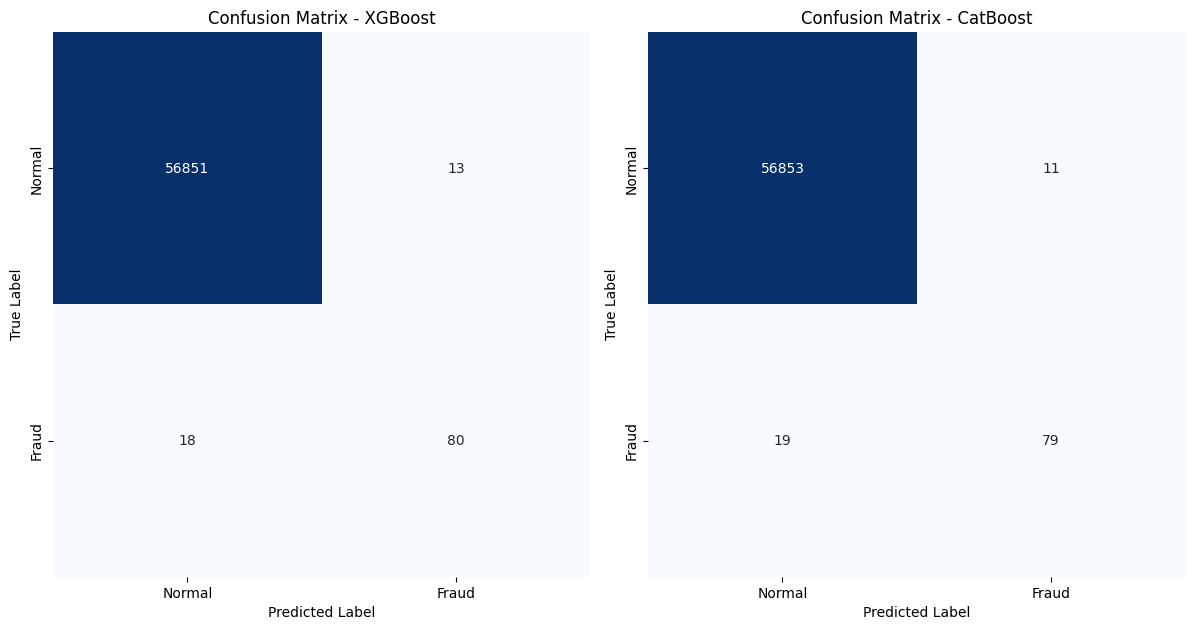

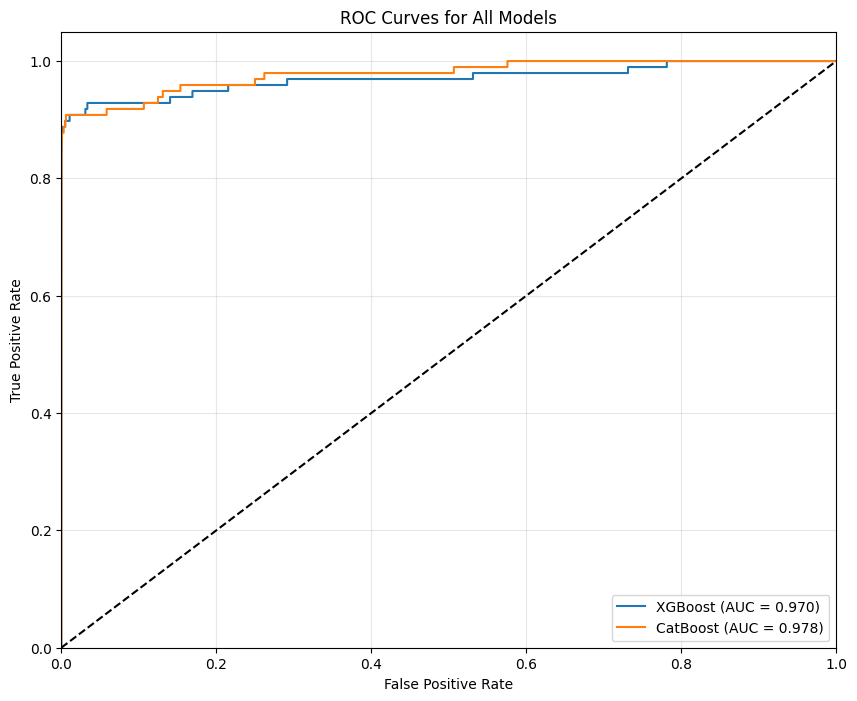

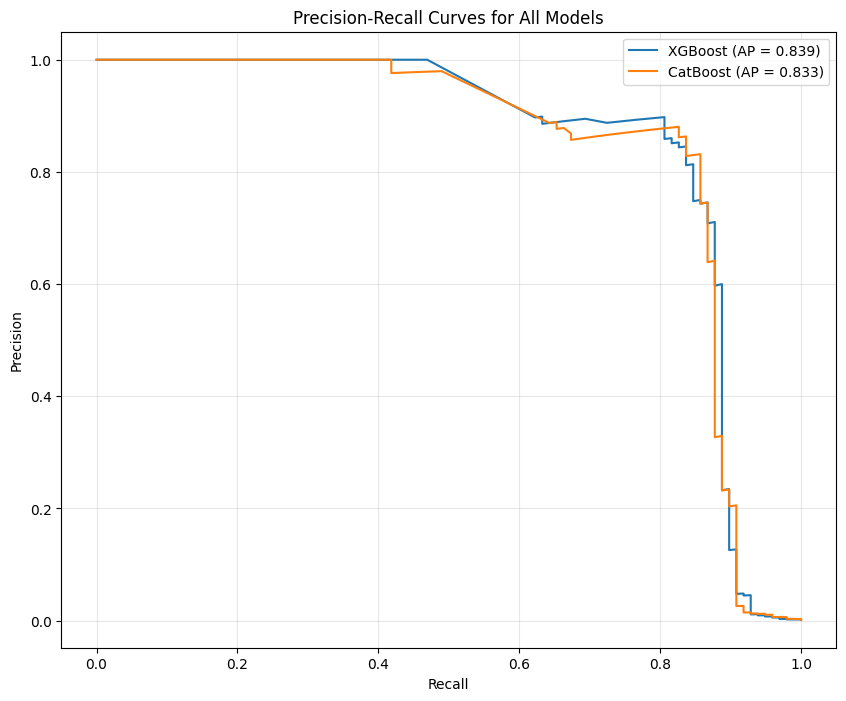

In [113]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define classification models to evaluate (removed Gradient Boosting, added CatBoost and AdaBoost)
models = {
    #'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42),
    'CatBoost': CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
}

# 2. Function to plot confusion matrix
def plot_confusion_matrix(cm, title, normalize=False):
    plt.figure(figsize=(6, 5))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', 
                cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.tight_layout()

# Dictionaries to store results
results = defaultdict(dict)
y_probs = {}
training_times = {}
testing_times = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Training with timing
    start_time = time.time()
    model.fit(X_train_array, y_train_array)
    training_times[name] = time.time() - start_time
    
    # Prediction with timing
    start_time = time.time()
    y_pred = model.predict(X_test_array)
    y_prob = model.predict_proba(X_test_array)[:, 1]
    testing_times[name] = time.time() - start_time
    
    # Store results
    y_probs[name] = y_prob
    
    # Classification metrics
    accuracy = accuracy_score(y_test_array, y_pred)
    precision = precision_score(y_test_array, y_pred)
    recall = recall_score(y_test_array, y_pred)
    f1 = f1_score(y_test_array, y_pred)
    
    # ROC and PR curves
    fpr, tpr, _ = roc_curve(y_test_array, y_prob)
    roc_auc = auc(fpr, tpr)
    
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_array, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    avg_precision = average_precision_score(y_test_array, y_prob)
    
    # Confusion matrix
    cm = confusion_matrix(y_test_array, y_pred)
    
    # Store all metrics
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Avg Precision': avg_precision,
        'Confusion Matrix': cm,
        'Training Time': training_times[name],
        'Testing Time': testing_times[name]
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print(f"{name} - ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Avg Precision: {avg_precision:.4f}")
    print(f"{name} - Training time: {training_times[name]:.2f}s, Testing time: {testing_times[name]:.2f}s")

# Plot confusion matrices for all models
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(2, 3, i+1)
    cm = metrics['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
plt.tight_layout()
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = results[name]['ROC AUC']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 7. Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for name, y_prob in y_probs.items():
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_array, y_prob)
    avg_precision = results[name]['Avg Precision']
    plt.plot(recall_curve, precision_curve, label=f'{name} (AP = {avg_precision:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.show()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU



Training SVM...


INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.decision_function: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.svm.SVC.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict_proba: running accelerated version on CPU
INFO:sklearnex:

SVM - Accuracy: 0.9888, Precision: 0.1176, Recall: 0.8469, F1: 0.2065
SVM - ROC AUC: 0.9737, PR AUC: 0.4223, Avg Precision: 0.4298
SVM - Training time: 75.85s, Testing time: 5.97s

Training XGBoost...


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


XGBoost - Accuracy: 0.9995, Precision: 0.8830, Recall: 0.8469, F1: 0.8646
XGBoost - ROC AUC: 0.9695, PR AUC: 0.8748, Avg Precision: 0.8749
XGBoost - Training time: 3.85s, Testing time: 0.06s

Training CatBoost...


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


CatBoost - Accuracy: 0.9995, Precision: 0.8646, Recall: 0.8469, F1: 0.8557
CatBoost - ROC AUC: 0.9760, PR AUC: 0.8743, Avg Precision: 0.8744
CatBoost - Training time: 11.89s, Testing time: 0.19s


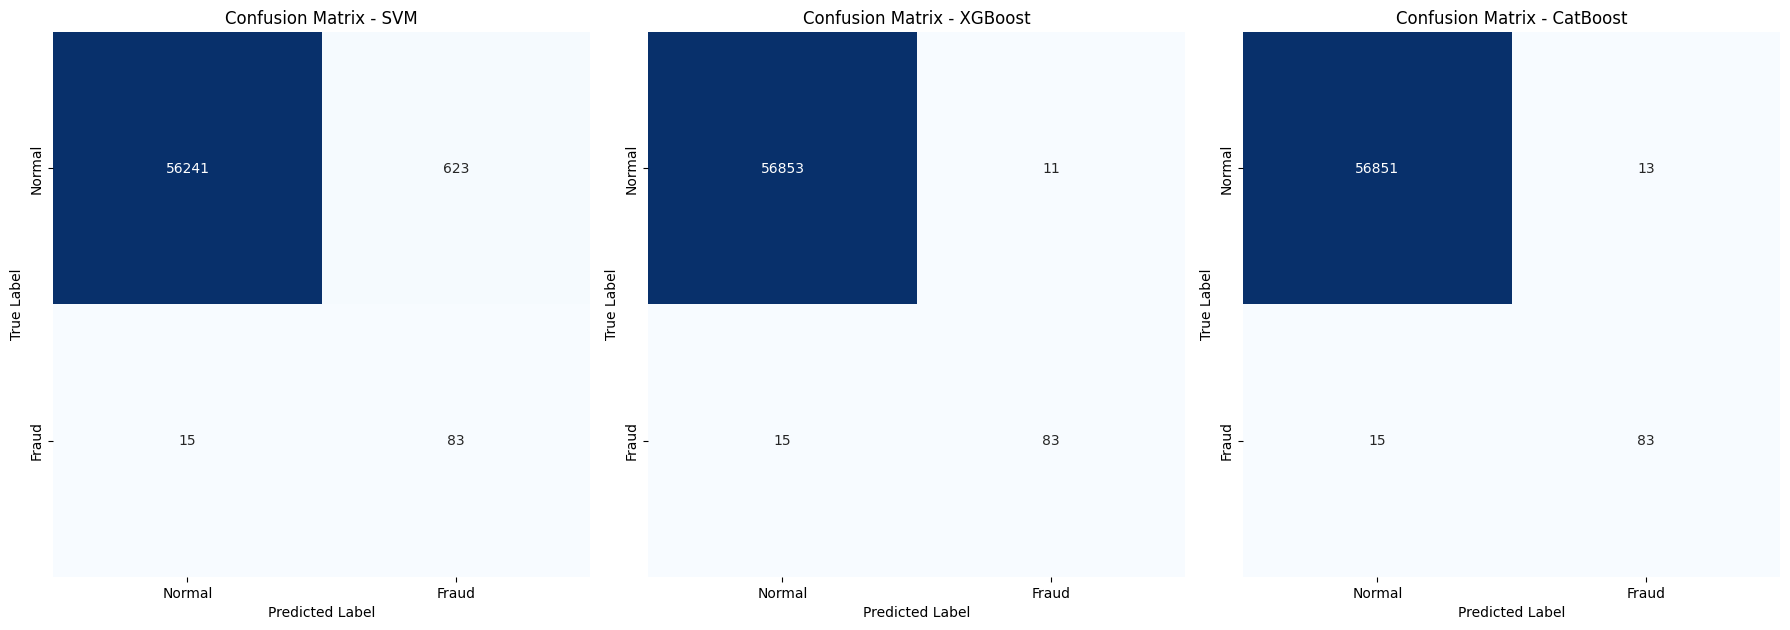

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


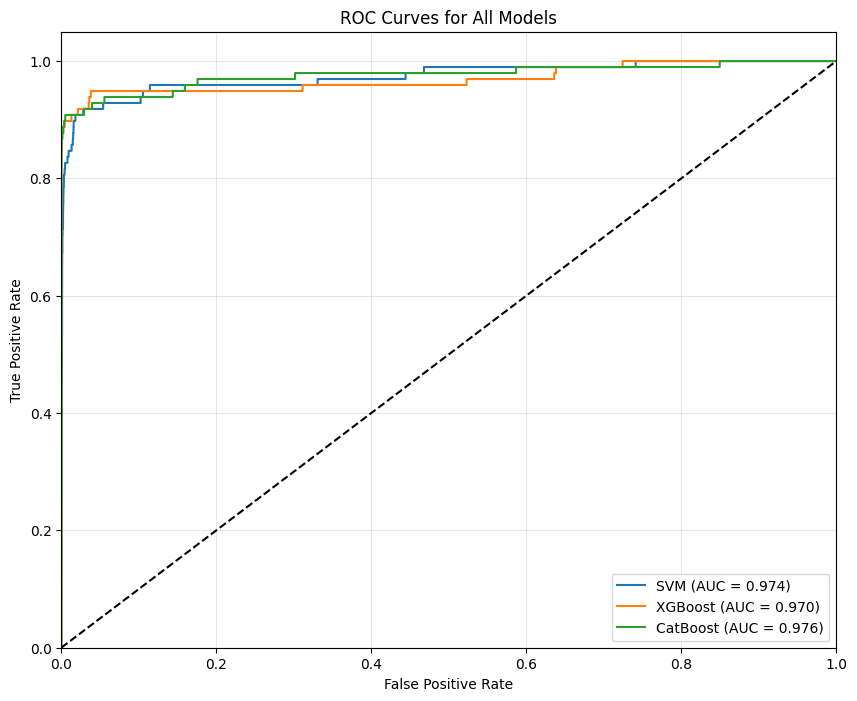

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


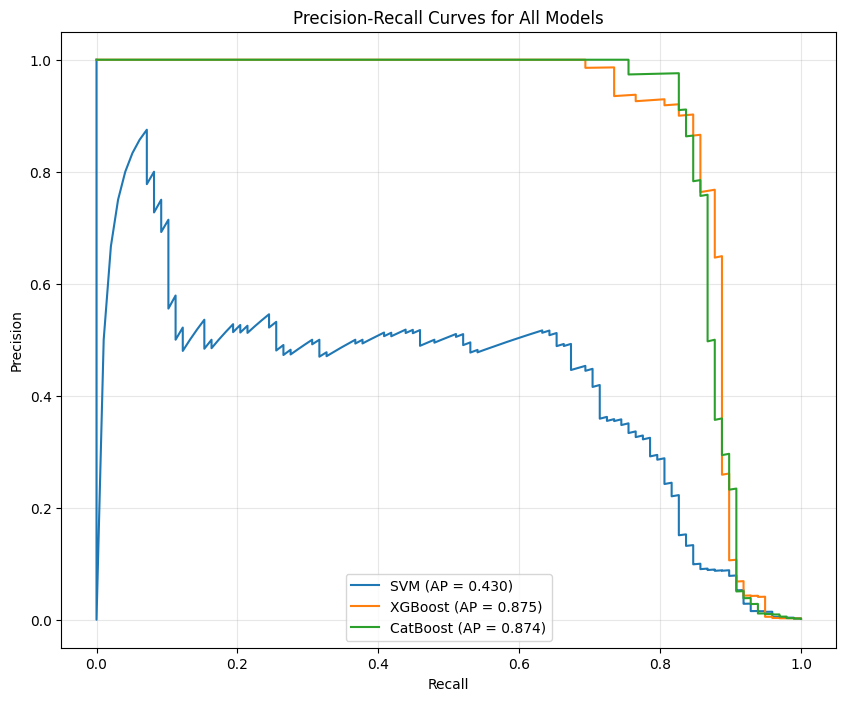

In [10]:
# Import Intel-optimized sklearn
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()  # This enables Intel acceleration

from sklearn.svm import SVC  # This is now the Intel-optimized version
import numpy as np

# Keep your existing data preparation
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

# Calculate sample weights for balanced classes if needed
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight('balanced', y_train_array)

# Calculate weight for XGBoost
scale_pos_weight = np.sum(y_train_array == 0) / np.sum(y_train_array == 1)

models = {
    'SVM': SVC(probability=True, gamma=0.01, class_weight='balanced', random_state=42), # Using Intel-optimized sklearn
    'XGBoost': xgb.XGBClassifier(n_estimators=1000, max_depth=8, random_state=42, 
                                tree_method='gpu_hist', scale_pos_weight=scale_pos_weight),
    'CatBoost': CatBoostClassifier(n_estimators=1000, depth=8, random_state=42, verbose=0, 
                                task_type='GPU', auto_class_weights='Balanced')
}

# Function to plot confusion matrix (unchanged)
def plot_confusion_matrix(cm, title, normalize=False):
    plt.figure(figsize=(6, 5))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', 
                cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.tight_layout()

# Dictionaries to store results
results = defaultdict(dict)
y_probs = {}
training_times = {}
testing_times = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Training with timing
    start_time = time.time()
    if name == 'SVM':
        # Use CPU arrays for Intel-optimized SVM
        model.fit(X_train_array, y_train_array)
    else:
        # Standard fitting for other models
        model.fit(X_train_array, y_train_array)
    training_times[name] = time.time() - start_time
    
    # Prediction with timing
    start_time = time.time()
    y_pred = model.predict(X_test_array)
    y_prob = model.predict_proba(X_test_array)[:, 1]
    testing_times[name] = time.time() - start_time
    
    # Store results
    y_probs[name] = y_prob
    
    # Classification metrics
    accuracy = accuracy_score(y_test_array, y_pred)
    precision = precision_score(y_test_array, y_pred)
    recall = recall_score(y_test_array, y_pred)
    f1 = f1_score(y_test_array, y_pred)
    
    # ROC and PR curves
    fpr, tpr, _ = roc_curve(y_test_array, y_prob)
    roc_auc = auc(fpr, tpr)
    
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_array, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    avg_precision = average_precision_score(y_test_array, y_prob)
    
    # Confusion matrix
    cm = confusion_matrix(y_test_array, y_pred)
    
    # Store all metrics
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Avg Precision': avg_precision,
        'Confusion Matrix': cm,
        'Training Time': training_times[name],
        'Testing Time': testing_times[name]
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print(f"{name} - ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}, Avg Precision: {avg_precision:.4f}")
    print(f"{name} - Training time: {training_times[name]:.2f}s, Testing time: {testing_times[name]:.2f}s")



# Plot confusion matrices for all models
plt.figure(figsize=(18, 12))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(2, 3, i+1)
    cm = metrics['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Normal', 'Fraud'])
    plt.yticks([0.5, 1.5], ['Normal', 'Fraud'])
plt.tight_layout()
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test_array, y_prob)
    roc_auc = results[name]['ROC AUC']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 7. Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for name, y_prob in y_probs.items():
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_array, y_prob)
    avg_precision = results[name]['Avg Precision']
    plt.plot(recall_curve, precision_curve, label=f'{name} (AP = {avg_precision:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.show()